In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [140]:
cases_train = pd.read_csv("cases_2021_train.csv")
cases_test = pd.read_csv("cases_2021_test.csv")
location = pd.read_csv("location_2021.csv")

In [104]:
def clean_outcome_labels(df):
    conditions = [
        (df['outcome'].str.contains("discharge|hospitalized|critical condition", case=False)),
        (df['outcome'].str.contains("alive|treatment|hom|released|stable", case=False)),
        (df['outcome'].str.contains("dead|death|deceased|died", case=False)),
        (df['outcome'].str.contains("recovered", case=False))
    ]

    values = ['hospitalized','nonhospitalized','deceased','recovered']
    df.drop("outcome", inplace=True, axis=1)
    df['outcome_group'] = np.select(conditions,values)
    return df

In [105]:
cases_train = clean_outcome_labels(cases_train)
cases_train

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...
205841,NaN,NaN,Maharashtra,India,16.70446,74.24137,21.05.2020,NaN,NaN,False,hospitalized
205842,NaN,NaN,Telangana,India,17.39487,78.47076,26.04.2020,NaN,https://twitter.com/Eatala_Rajender/status/125...,False,hospitalized
205843,NaN,NaN,Maharashtra,India,19.20000,72.96667,22.05.2020,NaN,NaN,False,recovered
205844,NaN,NaN,Maharashtra,India,18.94017,72.83483,24.05.2020,NaN,https://t.me/Allindiacovid/3814,False,hospitalized


In [10]:
cases_train.groupby('outcome_group').size()

outcome_group
deceased             4031
hospitalized       135726
nonhospitalized       779
recovered           65310
dtype: int64

In [11]:
cases_train[cases_train['country']=='United States']

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
11591,70-79,female,Washington,United States,47.491332,-121.803640,05.03.2020,"Life Care Center resident, was hospitalized at...",https://www.kingcounty.gov/depts/health/news/2...,False,deceased
22200,90-99,female,Washington,United States,47.491332,-121.803640,04.03.2020,"Life Care resident, was hospitalized at Evergr...",https://www.kingcounty.gov/depts/health/news/2...,False,deceased
24034,70,male,Oregon,United States,45.546910,-122.414900,10.03.2020,NaN,https://www.oregon.gov/oha/ERD/Pages/first-mul...,False,deceased
31183,70-79,female,Washington,United States,47.491332,-121.803640,02.03.2020,"A female in her 70s, a resident of LifeCare, h...",https://www.kingcounty.gov/depts/health/news/2...,False,deceased
41505,NaN,NaN,Minnesota,United States,45.006522,-93.478360,13.03.2020,travel-related,https://bringmethenews.com/minnesota-news/conf...,False,hospitalized
41932,80-89,female,Washington,United States,47.491332,-121.803640,06.03.2020,"a Life Care Center resident, was hospitalized ...",https://www.kingcounty.gov/depts/health/news/2...,False,deceased
59323,80-89,female,Washington,United States,47.609720,-122.333000,02.03.2020,"a resident of LifeCare, was hospitalized at Ev...",https://www.kingcounty.gov/depts/health/news/2...,False,deceased
74707,NaN,NaN,Minnesota,United States,45.006522,-93.478360,13.03.2020,NaN,https://bringmethenews.com/minnesota-news/conf...,False,hospitalized
84670,90-99,female,Washington,United States,47.491332,-121.803640,04.03.2020,"Life Care resident, was hospitalized at Evergr...",https://www.kingcounty.gov/depts/health/news/2...,False,deceased
87178,NaN,NaN,Minnesota,United States,45.006522,-93.478360,13.03.2020,travel-related,https://bringmethenews.com/minnesota-news/conf...,False,hospitalized


# 1.3 EDA

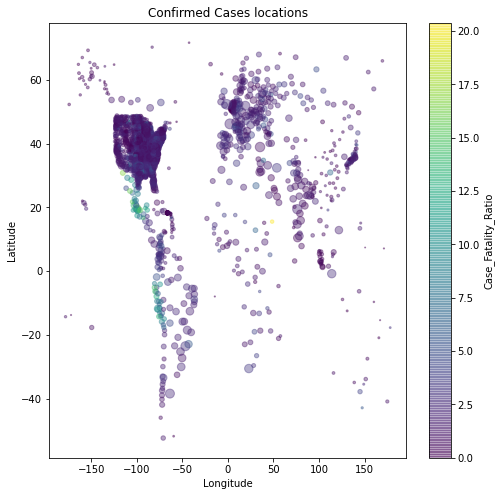

In [12]:
#plot the long and lat (combine lan and )
#https://www.machinelearningplus.com/plots/python-scatter-plot/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
plt.figure(figsize=(8,8))
plt.title('Confirmed Cases locations')
plot_location_scatter_plot = plt.scatter(x=location['Long_'], y=location['Lat'],c=location['Case_Fatality_Ratio'],
                                         s=location['Confirmed']**0.3,alpha=0.4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label="Case_Fatality_Ratio")

The number of confirmed cases and Case_Fatality_Ratio on the Latitude and Longitude plot , we can find that Most confirmed cases are discovered in the United States and Western Europe. The Case_Fatality_Ratio is relatively high when latitude and longitude are 20 and -100,  which are located in Mexico and some regions in South America.

Text(0.5, 1.0, 'The confirmed number,recover number,active number and death number of the Top countries with the highest confirmed cases')

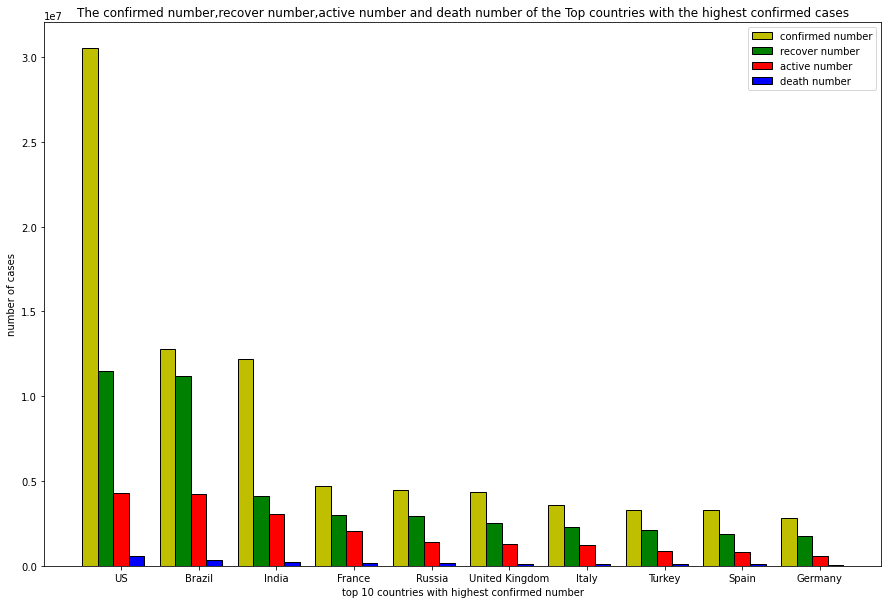

In [13]:
#countries with most comfirmed cases
plt.figure(figsize=(15,10))
total = location.groupby(by='Country_Region').sum()
#sort the comfirm cases descendingly.
death = total.sort_values(by='Deaths', ascending=False).head(10).reset_index()
confirmed = total.sort_values(by='Confirmed', ascending=False).head(10).reset_index()
recovered = total.sort_values(by='Recovered', ascending=False).head(10).reset_index()
active = total.sort_values(by='Active', ascending=False).head(10).reset_index()

_X = np.arange(10)
width = 0.2
plt.bar(_X - 2*width, confirmed['Confirmed'], color = 'y',
        width = width, edgecolor = 'black',
        label='confirmed number')
plt.bar(_X - width, recovered['Recovered'], color = 'g',
        width = width, edgecolor = 'black',
        label='recover number')
plt.bar(_X, active['Active'], color = 'r',
        width = width, edgecolor = 'black',
        label='active number')
plt.bar(_X+width, death['Deaths'], color = 'b',
        width = width, edgecolor = 'black',
        label='death number')
plt.xticks(_X, confirmed["Country_Region"])
plt.legend()
plt.xlabel('top 10 countries with highest confirmed number')
plt.ylabel('number of cases')
plt.title('The confirmed number,recover number,active number and death number of the Top countries with the highest confirmed cases')

The confirmed cases, recovered cases, active cases and death cases in the countries with top 10 confirmed cases, we can find that the confirmed cases in the United States significantly surpass other countries, which are twice as many compared to Brazil and India. Across these ten countries, the recovered rate of COVID-19 is way higher compared to the active rate and death rate. Based on the relatively low death and active number across these countries, we might have evidence to conclude the fatality of COVID-19 is not severe.


Text(0.5, 1.0, 'Top countries with the highest incidence rate')

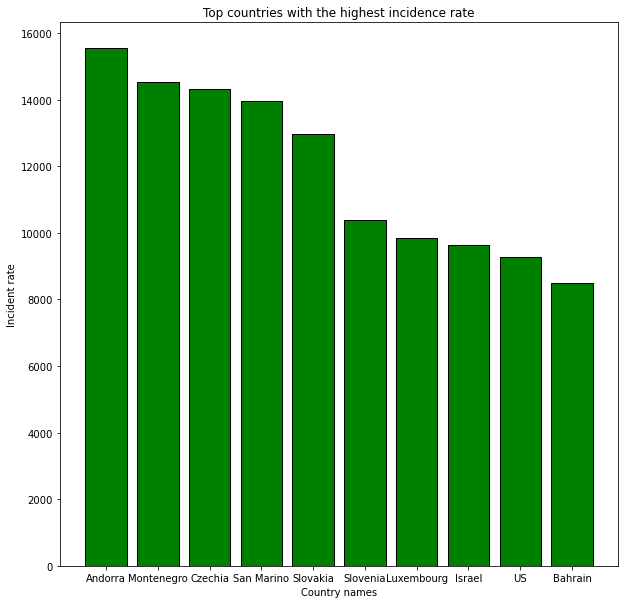

In [14]:
#most_incidence_rate find whether higher incidence rate leads to higher fatality rate
plt.figure(figsize=(10,10))
mean = location.groupby(by='Country_Region').mean()
incidence_rate = mean.sort_values(by='Incident_Rate', ascending=False).head(10).reset_index()
plt.bar( incidence_rate['Country_Region'], incidence_rate['Incident_Rate'], color='g',edgecolor = 'black')
plt.ylabel('Incident rate')
plt.xlabel('Country names')
plt.title('Top countries with the highest incidence rate')

The top 10 countries with highest incidence rate , we can find that the incidence rates in Andorra, Montenegro, Czechia and San Marino fluctuate between 14,000. In addition, the incidences in US, Bahrain, Israel and Luxembourg float between 9000. 

Text(0.5, 1.0, 'Top countries with the highest Case_Fatality_Ratio')

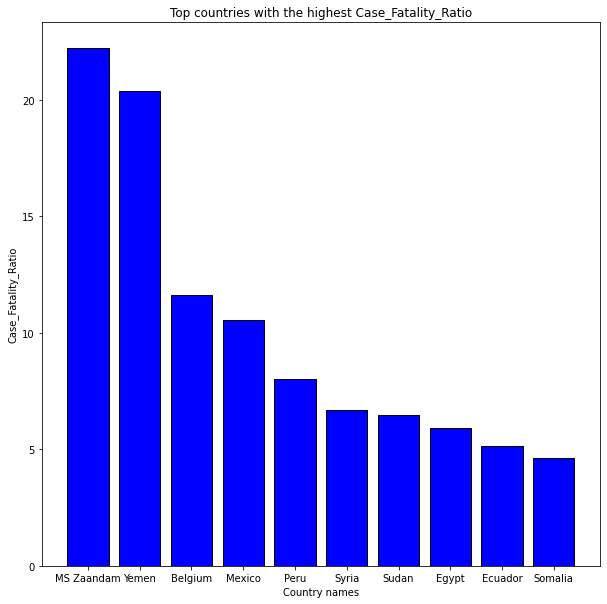

In [15]:
plt.figure(figsize=(10,10))
mean = location.groupby(by='Country_Region').mean()
ratio = mean.sort_values(by='Case_Fatality_Ratio', ascending=False).head(10).reset_index()
plt.bar( ratio['Country_Region'], ratio['Case_Fatality_Ratio'], color='b',edgecolor = 'black')
plt.ylabel('Case_Fatality_Ratio')
plt.xlabel('Country names')
plt.title('Top countries with the highest Case_Fatality_Ratio')

The top 10 countries with highest case_fatality_ratio, we can find that the case_fatality_ratio in MS Zaandam and Yeman are over 20,  followed by Belgium and Mexico where the ratios fluctuate between 11. The case_fatality ratio in the rest of the countries is stable at around 6. 

In [16]:
#Missing values for training data
for col in cases_train.columns:
    print(f' {col} has {cases_train[col].isna().sum()} missing values')

 age has 182793 missing values
 sex has 180362 missing values
 province has 604 missing values
 country has 1 missing values
 latitude has 0 missing values
 longitude has 0 missing values
 date_confirmation has 51 missing values
 additional_information has 193444 missing values
 source has 18394 missing values
 chronic_disease_binary has 0 missing values
 outcome_group has 0 missing values


In [17]:
#Missing values for testing data
for col in cases_test.columns:
    print(f'{col} has {cases_test[col].isna().sum()} missing values')

age has 90013 missing values
sex has 88765 missing values
province has 296 missing values
country has 1 missing values
latitude has 0 missing values
longitude has 0 missing values
date_confirmation has 23 missing values
additional_information has 95206 missing values
source has 9160 missing values
chronic_disease_binary has 0 missing values
outcome_group has 101387 missing values


In [18]:
#Missing values for location data
for col in location.columns:
    print(f'{col} has {location[col].isna().sum()} missing values')

Province_State has 174 missing values
Country_Region has 0 missing values
Last_Update has 0 missing values
Lat has 89 missing values
Long_ has 89 missing values
Confirmed has 0 missing values
Deaths has 0 missing values
Recovered has 3275 missing values
Active has 3275 missing values
Combined_Key has 0 missing values
Incident_Rate has 90 missing values
Case_Fatality_Ratio has 48 missing values


<ipython-input-19-fe768e46ddf1>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


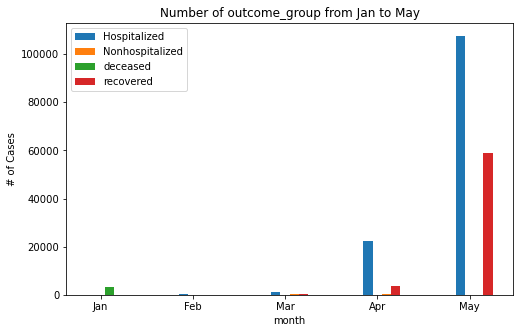

In [19]:
cases_train['month']= cases_train['date_confirmation'].str[4:5].dropna().astype(int)
Jan = cases_train[cases_train['month'] == 1].groupby("outcome_group").agg({'month':'count'}).to_numpy()
Feb = cases_train[cases_train['month'] == 2].groupby("outcome_group").agg({'month':'count'}).to_numpy()
Mar = cases_train[cases_train['month'] == 3].groupby("outcome_group").agg({'month':'count'}).to_numpy()
Apr = cases_train[cases_train['month'] == 4].groupby("outcome_group").agg({'month':'count'}).to_numpy()
May = cases_train[cases_train['month'] == 5].groupby("outcome_group").agg({'month':'count'}).to_numpy()
hospitalized = [Jan[1][0],Feb[1][0],Mar[1][0],Apr[1][0],May[1][0]]
nonhospitalized = [Jan[2][0],Feb[2][0],Mar[2][0],Apr[2][0],May[2][0]]
deceased = [Jan[0][0],Feb[0][0],Mar[0][0],Apr[0][0],May[0][0]]
recovered = [Jan[3][0],Feb[3][0],Mar[3][0],Apr[3][0],May[3][0]]
labels = ['','Jan', 'Feb', 'Mar', 'Apr', 'May']
fig, ax = plt.subplots(figsize=(8,5))
x = np.arange(5)
width = 0.1
rects1 = ax.bar(x - width ,hospitalized,width, label='Hospitalized')
rects2 = ax.bar(x + width,nonhospitalized,width, label='Nonhospitalized')
rects3 = ax.bar(width,  deceased, width, label = 'deceased')
rects4 = ax.bar(x + 2*width, recovered, width, label = 'recovered')
ax.set_ylabel('# of Cases')
ax.set_xlabel('month')
ax.set_title('Number of outcome_group from Jan to May')
ax.set_xticklabels(labels)
ax.legend()
cases_train.drop("month", inplace=True, axis=1)

The number of outcome_group(Hospitalized, Nonhospitalized, deceased and recovered) from Jan to May, we can find that most hospitalized and recovered cases happened in April and May. In January when the vaccine of COVID-19 has been widely used, the deceased cases domain the majority of the outcome_group in January. In addition, more and more hospitalized cases occur in February and March. More hospitalized cases occurred in February and March. 
